In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../lib/')
from frustration_graph import bqm_frustration
import pickle
import os
import copy
import time
import os

In [2]:
from dwave.system import DWaveSampler, EmbeddingComposite
import dimod
import dwave.inspector

In [3]:
qpu = DWaveSampler()
sampler = EmbeddingComposite(qpu)

In [8]:
L = 4
bqm = bqm_frustration(L, 0.8, 0)

In [27]:
sampleset = sampler.sample(bqm, num_reads=50, 
               label=f'Plot Ising Frustrato')

In [28]:
dwave.inspector.show(sampleset)

'http://127.0.0.1:18000/?problemId=af736109-d0a2-4840-8f51-fd40670544d6'

In [34]:
f = []
for set in sampleset.record:
    f.append(set[2])

In [51]:
node_col = []
for node in sampleset.record[0][0]:
    if node == 1:
        node_col.append([123/255, 180/255, 248/255])
    else:
        node_col.append('white')

C:\Users\cosmi\AppData\Local\Temp\ipykernel_12436\929812935.py:1: DeprecationWarning: BinaryQuadraticModel.to_networkx_graph() is deprecated since dimod 0.10.0 and will be removed in 0.12.0. Use dimod.to_networkx_graph() instead.
  G = bqm.to_networkx_graph()
c:\Users\cosmi\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


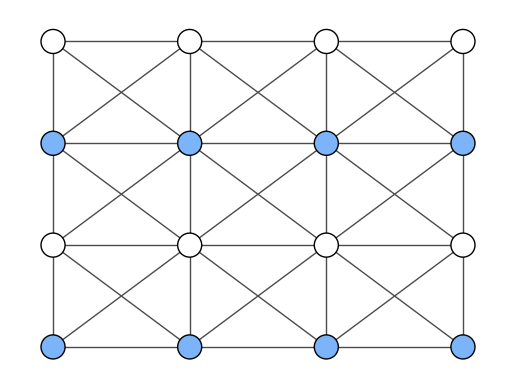

In [75]:
G = bqm.to_networkx_graph()

tmp = nx.grid_2d_graph(L, L)

pos = {f'{x}-{y}':(y,-x) for x in range(L) for y in range(L)}
nx.draw_networkx_nodes(G, pos=pos, node_color=node_col, edgecolors='k')

direct = []
for edge in tmp.edges:
    (x1, y1), (x2, y2) = edge
    direct.append((f'{x1}-{x2}', f'{x2}-{y2}'))


nx.draw_networkx_edges(G, pos=pos, edge_color=[76/255, 75/255, 75/255])
plt.axis('off')
plt.savefig('striped_lattice.png', transparent=True, dpi=600)

In [65]:
G.edges

EdgeView([('0-0', '0-1'), ('0-0', '1-0'), ('0-0', '1-1'), ('0-1', '0-2'), ('0-1', '1-0'), ('0-1', '1-1'), ('0-1', '1-2'), ('0-2', '0-3'), ('0-2', '1-1'), ('0-2', '1-2'), ('0-2', '1-3'), ('0-3', '1-2'), ('0-3', '1-3'), ('1-0', '1-1'), ('1-0', '2-0'), ('1-0', '2-1'), ('1-1', '1-2'), ('1-1', '2-0'), ('1-1', '2-1'), ('1-1', '2-2'), ('1-2', '1-3'), ('1-2', '2-1'), ('1-2', '2-2'), ('1-2', '2-3'), ('1-3', '2-2'), ('1-3', '2-3'), ('2-0', '2-1'), ('2-0', '3-0'), ('2-0', '3-1'), ('2-1', '2-2'), ('2-1', '3-0'), ('2-1', '3-1'), ('2-1', '3-2'), ('2-2', '2-3'), ('2-2', '3-1'), ('2-2', '3-2'), ('2-2', '3-3'), ('2-3', '3-2'), ('2-3', '3-3'), ('3-0', '3-1'), ('3-1', '3-2'), ('3-2', '3-3')])

ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
